# 4. Dask Dataframe

### Scenariusz: porównanie `pandas.dataframe` i `dask.dataframe`

### pandas.dataframe

Wczytanie pliku csv z [Netflowami](https://zasobynauki.pl/zasoby/?entry_type=net) i grupowanie po rodzaju protokołu. 

In [1]:
import pandas as pd


df = pd.read_csv('data/flows-1.csv')
df

,ts,te,td,sa,da,sp,dp,pr,flg,fwd,...,mpls8,mpls9,mpls10,cl,sl,al,ra,eng,exid,tr
0,2019-07-16 23:55:09,2019-07-16 23:55:09,0.0,PL,PL,161,50572,UDP,......,0,...,0-0-0,0-0-0,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,0,1970-01-01 01:00:00.000
1,2019-07-16 23:55:09,2019-07-16 23:55:09,0.0,PL,PL,34906,161,UDP,......,0,...,0-0-0,0-0-0,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,0,1970-01-01 01:00:00.000
2,2019-07-16 23:55:09,2019-07-16 23:55:09,0.0,PL,PL,45398,53,UDP,......,0,...,0-0-0,0-0-0,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,0,1970-01-01 01:00:00.000
3,2019-07-16 23:55:09,2019-07-16 23:55:09,0.0,PL,PL,161,34906,UDP,......,0,...,0-0-0,0-0-0,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,0,1970-01-01 01:00:00.000
4,2019-07-16 23:55:09,2019-07-16 23:55:09,0.0,PL,PL,53,45398,UDP,......,0,...,0-0-0,0-0-0,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,0,1970-01-01 01:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2019-07-16 23:55:03,2019-07-16 23:55:03,0.0,rfc1918,rfc1918,0,0,ICMP,......,0,...,0-0-0,0-0-0,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,0,1970-01-01 01:00:00.000
496,2019-07-16 23:55:09,2019-07-16 23:55:09,0.0,PL,PL,58178,161,UDP,......,0,...,0-0-0,0-0-0,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,0,1970-01-01 01:00:00.000
497,2019-07-16 23:55:09,2019-07-16 23:55:09,0.0,PL,PL,161,58178,UDP,......,0,...,0-0-0,0-0-0,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,0,1970-01-01 01:00:00.000
498,2019-07-16 23:55:09,2019-07-16 23:55:09,0.0,PL,PL,57842,161,UDP,......,0,...,0-0-0,0-0-0,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,0,1970-01-01 01:00:00.000


In [2]:
df.groupby('pr').pr.count()

pr
ICMP    136
TCP      52
UDP     312
Name: pr, dtype: int64

### dask.dataframe


In [3]:
from dask import dataframe as dd

df = dd.read_csv('data/flows-1.csv')
df

,ts,te,td,sa,da,sp,dp,pr,flg,fwd,stos,ipkt,ibyt,opkt,obyt,in,out,sas,das,smk,dmk,dtos,dir,nh,nhb,svln,dvln,ismc,odmc,idmc,osmc,mpls1,mpls2,mpls3,mpls4,mpls5,mpls6,mpls7,mpls8,mpls9,mpls10,cl,sl,al,ra,eng,exid,tr
npartitions=1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,object,object,float64,object,object,int64,int64,object,object,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,object,object,int64,int64,int64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,float64,float64,float64,object,object,int64,object
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [4]:
df.head()

,ts,te,td,sa,da,sp,dp,pr,flg,fwd,...,mpls8,mpls9,mpls10,cl,sl,al,ra,eng,exid,tr
0,2019-07-16 23:55:09,2019-07-16 23:55:09,0.0,PL,PL,161,50572,UDP,......,0,...,0-0-0,0-0-0,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,0,1970-01-01 01:00:00.000
1,2019-07-16 23:55:09,2019-07-16 23:55:09,0.0,PL,PL,34906,161,UDP,......,0,...,0-0-0,0-0-0,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,0,1970-01-01 01:00:00.000
2,2019-07-16 23:55:09,2019-07-16 23:55:09,0.0,PL,PL,45398,53,UDP,......,0,...,0-0-0,0-0-0,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,0,1970-01-01 01:00:00.000
3,2019-07-16 23:55:09,2019-07-16 23:55:09,0.0,PL,PL,161,34906,UDP,......,0,...,0-0-0,0-0-0,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,0,1970-01-01 01:00:00.000
4,2019-07-16 23:55:09,2019-07-16 23:55:09,0.0,PL,PL,53,45398,UDP,......,0,...,0-0-0,0-0-0,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,0,1970-01-01 01:00:00.000


In [5]:
task = df.groupby('pr').pr.count()
task

Dask Series Structure:
npartitions=1
    int64
      ...
Name: pr, dtype: int64
Dask Name: series-groupby-count-agg, 3 tasks

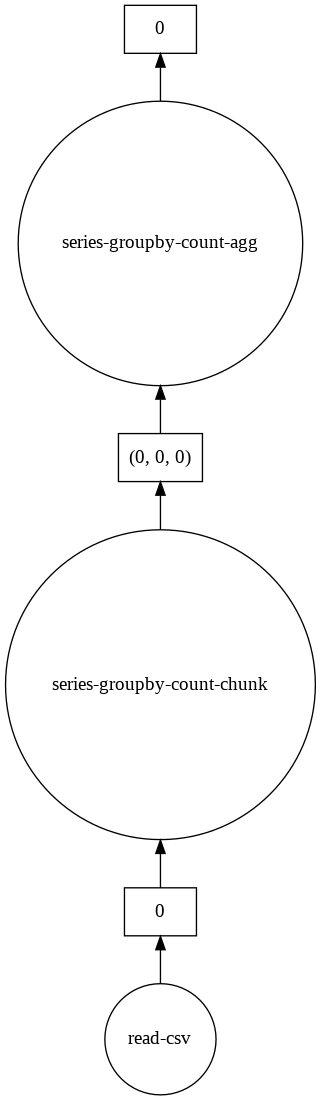

In [6]:
task.visualize()

In [7]:
task.compute()

pr
ICMP    136
TCP      52
UDP     312
Name: pr, dtype: int64

### dask.dataframe - wiele plików


In [8]:
df = dd.read_csv('data/flows-*.csv')
df

,ts,te,td,sa,da,sp,dp,pr,flg,fwd,stos,ipkt,ibyt,opkt,obyt,in,out,sas,das,smk,dmk,dtos,dir,nh,nhb,svln,dvln,ismc,odmc,idmc,osmc,mpls1,mpls2,mpls3,mpls4,mpls5,mpls6,mpls7,mpls8,mpls9,mpls10,cl,sl,al,ra,eng,exid,tr
npartitions=3,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,object,object,float64,object,object,int64,int64,object,object,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,object,object,int64,int64,int64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,float64,float64,float64,object,object,int64,object
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


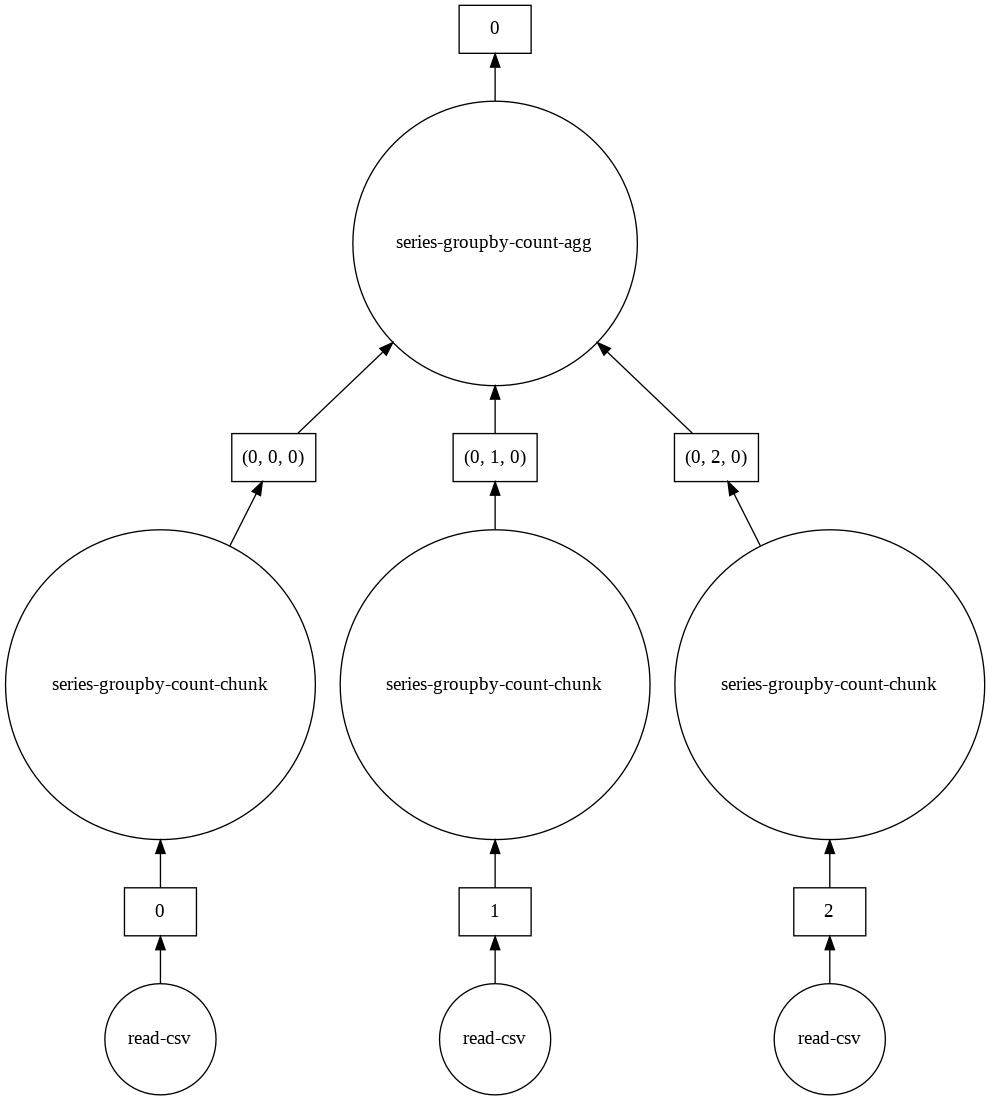

In [9]:
task = df.groupby('pr').pr.count()
task.visualize()

In [ ]:
task.compute()